In [1]:
import os
import importlib

import matplotlib.pyplot as plt
import pandas as pd
import anndata as ad
import scipy 
import seaborn as sns
import scanpy as sc
import numpy as np



import spatial_rgc.utils.aggregate_pipeline as ap
import spatial_rgc.utils.rconstants as rc
importlib.reload(rc)
import spatial_rgc.utils.run_container as container   
importlib.reload(container)
import spatial_rgc.utils.model_constants as constants
importlib.reload(constants)
BASE_DIR = constants.BASE_DIR

/opt/anaconda3/envs/RGC/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## MERFISH cell by gene pipeline

../../spatial_rgc/imaging_scripts/images
cell_id
1_rg0         True
2_rg0        False
3_rg0        False
4_rg0        False
5_rg0        False
             ...  
22647_rg4    False
22648_rg4    False
22649_rg4    False
22650_rg4    False
22651_rg4    False
Name: is_amacrine, Length: 77483, dtype: bool
0.0
     pc/Am+/RGC+  pc/Am+/RGC-  pc/Am-/RGC+  pc/Am-/RGC-  dpc/Am+/RGC+  \
M0      0.202888     0.761877     0.000144     0.035090           0.0   
M3      0.210679     0.707230     0.005562     0.076529           0.0   
M28     0.135475     0.002793     0.807263     0.054469           0.0   
M14     0.021528     0.070833     0.088194     0.819444           0.0   
M35     0.187251     0.011952     0.756972     0.043825           0.0   
M13     0.168840     0.065889     0.699382     0.065889           0.0   
M12     0.156673     0.031593     0.734365     0.077369           0.0   
M16     0.163695     0.014587     0.729335     0.092382           0.0   
M27     0.186111     0.036111     0

/Users/kushalnimkar/Documents/PhD/SpatialRGC/spatial_rgc/utils/assorted_utils.py:148: UserWarning: FixedFormatter should only be used together with FixedLocator
  dot_ax.set_xticklabels(xticksactual,rotation=90)


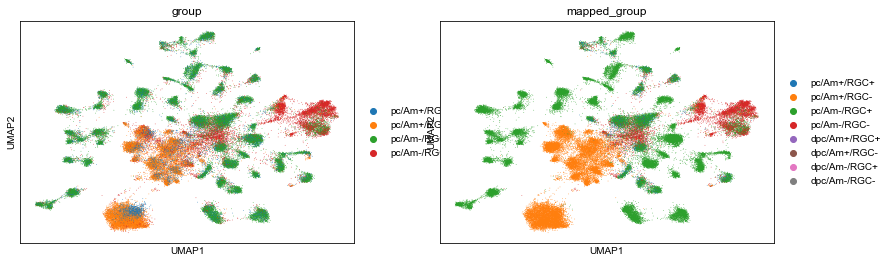

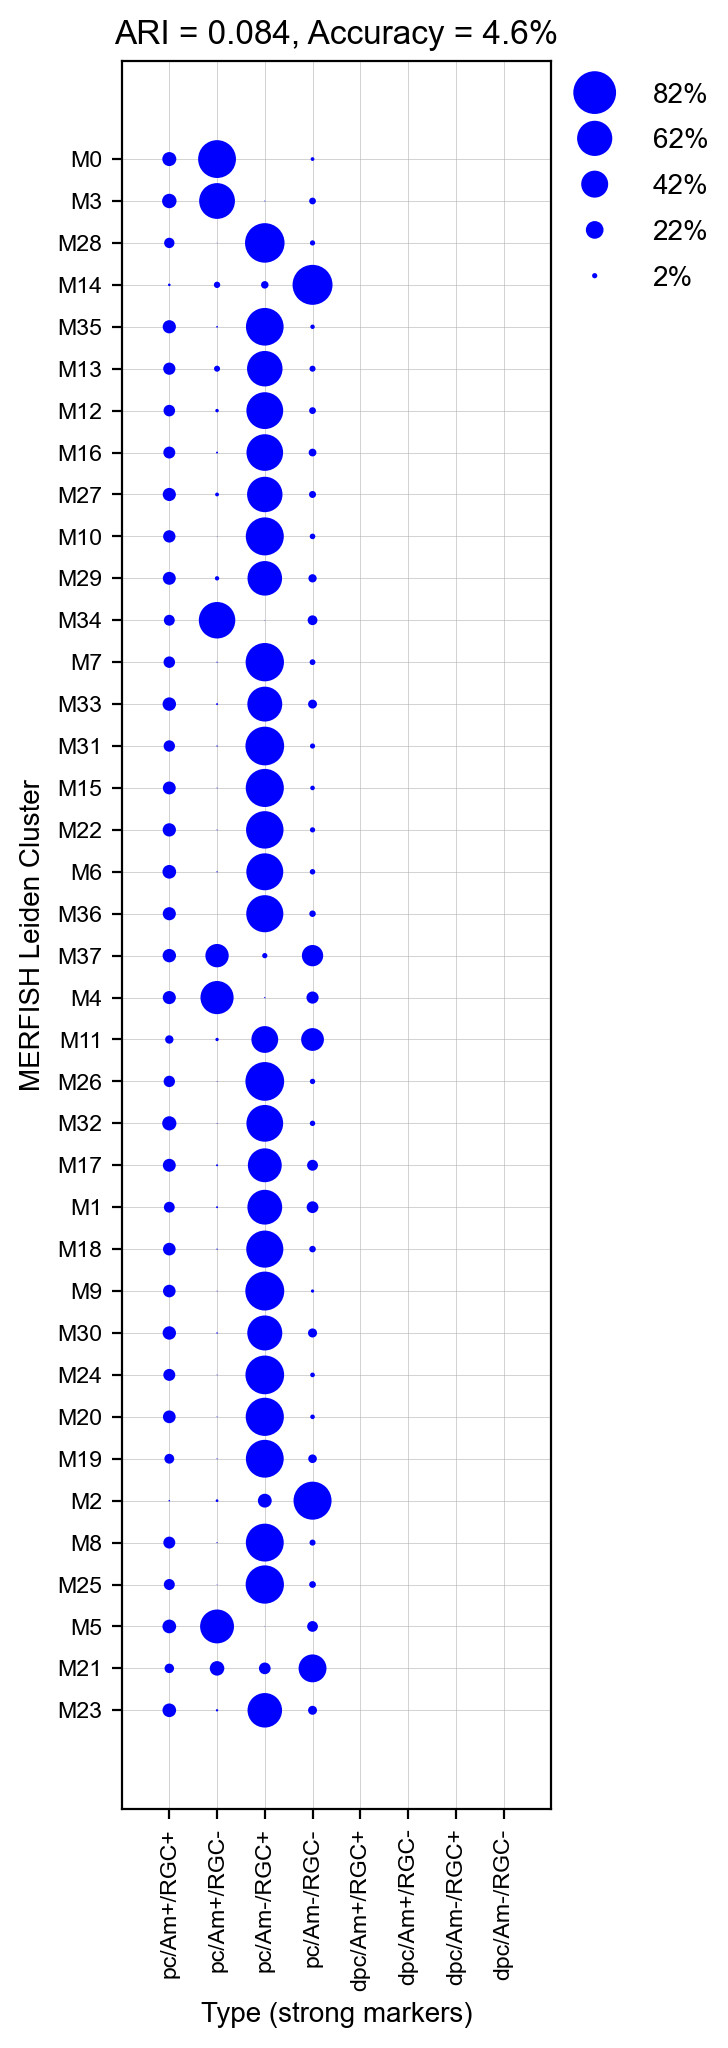

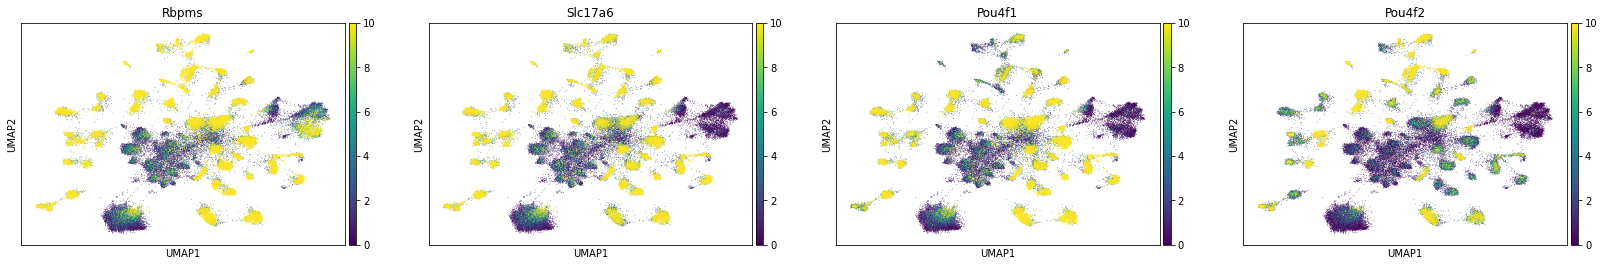

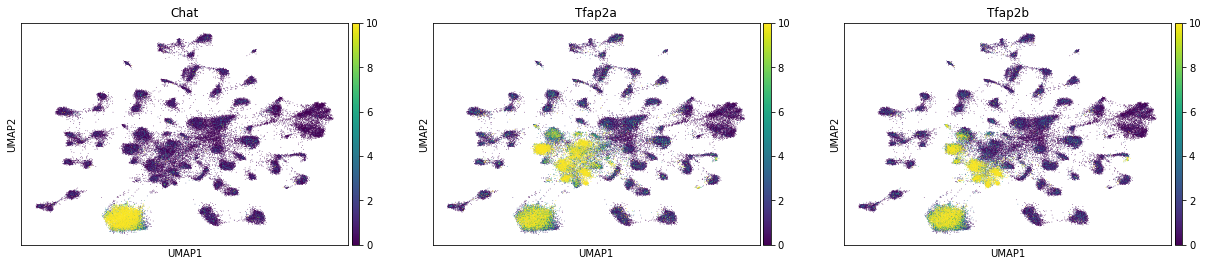

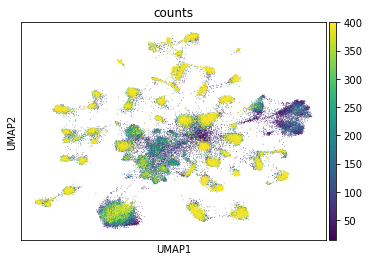

[30 13  1 33 11 21  0 12  2 14 29 34 24  3 25  7 19  4 27 17  5 18 28 15
 26  6 16 23 35 10 31 36  9  8 22 37 20 32] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37} {'Astrocyte': 0, 'Bipolar cell': 1, 'Both Gaba+Gly AC': 2, 'Endothelial': 3, 'GabaAC': 4, 'GlyAC': 5, 'Horizontal cell': 6, 'Microglia': 7, 'Muller glia': 8, 'Neither Gaba nor Gly AC': 9, 'Pericyte': 10, 'Photoreceptor': 11, 'RGC': 12, 'Unassigned': 13}
38 14
    Astrocyte  Bipolar cell  Both Gaba+Gly AC  Endothelial    GabaAC  \
2    0.042623      0.001311          0.000874     0.433005  0.004153   
3    0.000667      0.000667          0.163515     0.000222  0.744160   
4 

/Users/kushalnimkar/Documents/PhD/SpatialRGC/spatial_rgc/utils/assorted_utils.py:148: UserWarning: FixedFormatter should only be used together with FixedLocator
  dot_ax.set_xticklabels(xticksactual,rotation=90)


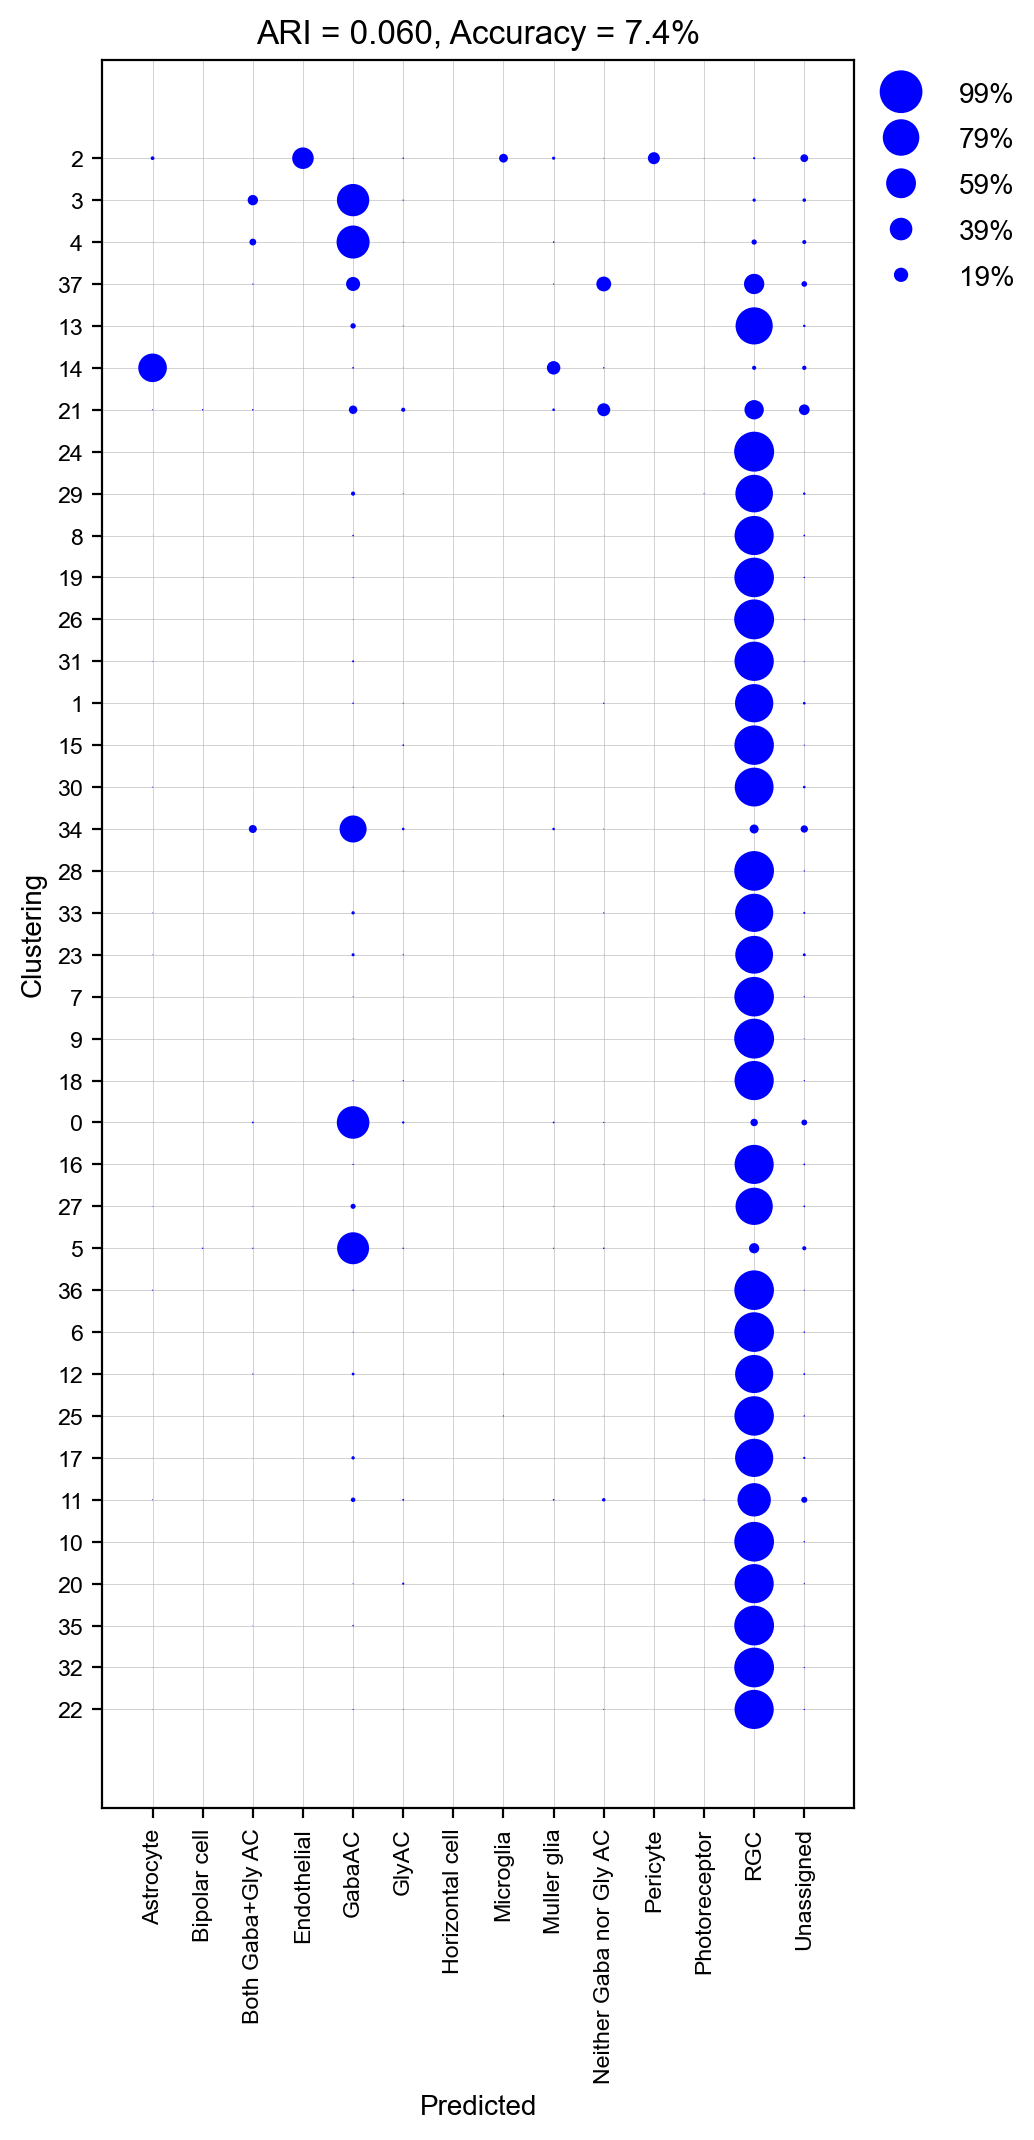

Remap 14 to be non-neuronal
Remap 2 to be non-neuronal
../../spatial_rgc/data/140g_rn17/Cellpose_merged_remapped_130.h5ad
../../spatial_rgc/data/140g_rn17/Cellpose_merged_remapped_130.h5ad
0.0
AnnData object with n_obs × n_vars = 77483 × 130
    obs: 'Size', 'center_x', 'center_y', 'max_areas', 'Anti-Goat', 'Anti-Rat', 'aligned_center_x', 'aligned_center_y', 'to_keep', 'region', 'is_amacrine', 'is_RGC', 'pass_cutoff', 'counts', 'group', 'group_num', 'class'
    layers: 'raw'
                  Size      center_x     center_y   max_areas   Anti-Goat  \
cell_id                                                                     
1_rg0      1645.680533  13590.760537  1594.609143  158.437690  372.396836   
2_rg0       287.203304  13470.096183  1599.716758  101.332940  366.282651   
3_rg0        45.907741  13569.132235  1606.993065   30.605160  723.256098   
4_rg0       274.046818  13437.994666  1612.479002  102.079407  439.083759   
5_rg0      1498.719777  13704.470223  1618.176750  206.958

In [3]:
importlib.reload(constants)
importlib.reload(rc)
importlib.reload(container)

run_regions = {
    "140g_rn3":[0,1,2,3],
    "140g_rn4":[0,1,2,3],
    "140g_rn5":[0,1,2,3],
    "140g_rn7":[0,1,2,4],
    "140g_rn16":[0,1,2,3],
    "140g_rn17":[0,1,2,3,4],
    "140g_rn16":[0,1,2,3],
    "140g_rn17":[0,1,2,3,4]
}
feature_names_f = constants.FEATURE_NAMES_F_130
xgb_model_f = constants.XGB_F_130
input_train_dict_f = constants.INPUT_TRAIN_DICT_F
rgc_median_transcripts = constants.RGC_MEDIAN_TRANSCRIPTS_DICT[xgb_model_f]
#Above pertains to rgc model
postfix="_130"
for run in run_regions:
    num_regions= run_regions[run]
    cont = container.RunContainer(runs=[run],regions_lst=num_regions,base_dir=constants.BASE_DIR,feature_names_f=feature_names_f,xgb_model_f=xgb_model_f,rgc_median_transcripts=rgc_median_transcripts,postfix=postfix,merged_remapped_f="Cellpose_merged_remapped.h5ad",all_reassigned_cells_f="all_cells_reassigned.h5ad",RGC_cache_f="RGC_only.h5ad",final_f="Cellpose_final_assignments.h5ad")
    cont.merge_and_remap(run)
    cont.apply_classifier(run=run, info=constants.MODEL_INFO["tran_yan_ONC_class"]) #pertains to class-level model
    cont.cache_RGCs(run,input_train_dict_f=constants.INPUT_TRAIN_DICT_F)
    adata = cont.create_final_assignments(run)
    cont.clone_run(postfix=postfix,run=run,run_new=f"{run}{postfix}")


In [36]:
runs =["140g_rn3_130", "140g_rn4_130", "140g_rn5_130","140g_rn7_130","140g_rn16_130","140g_rn17_130"]
num_regions=[0,1,2,3]
feature_names_f = constants.FEATURE_NAMES_F_130
xgb_model_f = constants.XGB_F_130
rgc_median_transcripts = constants.RGC_MEDIAN_TRANSCRIPTS_DICT[xgb_model_f]
# Note: no postfix necessary since that data was cloned into a new run folder with its postfix removed
cont = container.RunContainer(runs,base_dir=constants.BASE_DIR,regions_lst=num_regions,feature_names_f=feature_names_f,xgb_model_f=xgb_model_f,rgc_median_transcripts=rgc_median_transcripts)
adata_f="merged_control.h5ad"
adata_fout="merged_control_cluster.h5ad"
subd="control_130_6"
cont.merge_runs(runs=runs,subd=subd)
cont.cluster_all(adata_f=adata_f,adata_fout=adata_fout,subd=subd,n_neighbors=90)
adata = cont.joint_RGC_pipeline(adata_f,subd=subd, batch_key=None)

AnnData object with n_obs × n_vars = 205875 × 130
    obs: 'Size', 'center_x', 'center_y', 'max_areas', 'Cellbound3', 'aligned_center_x', 'aligned_center_y', 'to_keep', 'region', 'is_amacrine', 'is_RGC', 'pass_cutoff', 'counts', 'group', 'group_num', 'class', 'final_assignment', 'run'
    layers: 'raw'
Target sum: 174.0
Target sum: 174.0


## Add stain info (monkey patch) and class-level classifier

In [18]:
import spatial_rgc.utils.classifier as cl
import numpy as np


In [5]:
def reassign_others_control(adata, model_dir,model_name,train_dict_f):
    neuronal_classes = {"Bipolar cell","GabaAC",'GlyAC','Neither Gaba nor Gly AC','RGC'}
    non_neuronal_classes = {"Endothelial","Horizontal cell",'Microglia','Muller glia','Pericyte'}
    GROUP_MAP = {'pc/Am+/RGC+': "Other", 'pc/Am+/RGC-':"Amacrine", 'pc/Am-/RGC+':"RGC", 'pc/Am-/RGC-':"Other",'dpc/Am+/RGC+': "N/A", 'dpc/Am+/RGC-':"N/A", 'dpc/Am-/RGC+':"N/A", 'dpc/Am-/RGC-':"N/A"}
    adata.obs['class'] = adata.obs['class'].replace('Endo','Other')

    cutoff=0.5
    cl.apply_model(
        adata=adata,
        model_f=os.path.join(model_dir,model_name),
        train_dict=os.path.join(model_dir,train_dict_f),
        cutoff=cutoff,
        output_dir="",
        output_f="", 
        unassigned_indicator='Unassigned', 
        prefix='', 
        test_key='joint_leiden',
        train_key_added='retina_class',
        prefix_key=None,
        xlabel='Predicted',
        ylabel='Clustering'
    ) #Test key is usually clustering
    

def patch(adata,run_regions):
    unique_runs = adata.obs['run'].unique()
    for run in run_regions:
        regions = run_regions[run]['regions']
        stains = run_regions[run]['stains']
        adata_arr=[]
        assert run in unique_runs
        for region in regions:
            print(run,region)
            adata_i=sc.read_h5ad(os.path.join(BASE_DIR,"data",f"140g_rn{run}_rg{region}",f"Cellpose_model_c2knl_full_retina.h5ad"))
            print(adata_i)
            adata_arr.append(adata_i)

        adata_p = ad.concat(adata_arr,index_unique='_rg')
        adata_p.obs.index =[id +f"_rn{run}" for id in adata_p.obs.index]
        print(adata_p.obs.index)
        for stain in stains:
            if stain not in adata.obs.columns:
                adata.obs[stain] = adata_p.obs[stain]
            else:
                adata.obs[stain].update(adata_p.obs[stain])

    return adata_p

def update_anti_rat(adata):
    adata.obs['Anti-Rat']=np.nan
    for rn in [4,16,17]:
        adata_t=sc.read_h5ad(os.path.join(BASE_DIR,"data",f"140g_rn{rn}_130","Cellpose_final_assignments.h5ad"))
        
        if rn == 4:
            adata_t.obs['Anti-Rat']=np.nan
            for rg in [0,1,2,3]:
                adata_rg = sc.read_h5ad(os.path.join(BASE_DIR,"data",f"140g_rn{rn}_rg{rg}","Cellpose_model_c2knl_full_retina.h5ad"))
                adata_rg.obs.index= adata_rg.obs.index + f"_rg{rg}"
                #print(adata_rg.obs.columns)
                adata_t.obs.update(adata_rg.obs,overwrite=False)

        adata_t.obs.index = adata_t.obs.index + f"_rn{rn}"
        print(adata_t.obs.columns)
        adata.obs.update(adata_t.obs,overwrite=False)

def update_anti_goat(adata):
    adata.obs['Anti-Goat']=np.nan
    for rn in [14,16,17]:
        adata_t=sc.read_h5ad(os.path.join("data",f"140g_rn{rn}_130","Cellpose_final_assignments.h5ad"))
        adata_t.obs.index = adata_t.obs.index + f"_rn{rn}"
        print(adata_t.obs.columns)
        adata.obs.update(adata_t.obs,overwrite=False)


info = constants.MODEL_INFO['tran_yan_ONC_class']
model_dir=info['model_dir']
model_name=f"valid_{info['model_name']}"
train_dict_f=info['train_dict_name']
run="control_130_6"


run_regions_patch = {
    4:{'regions':[0,1,2,3],'stains':['Anti-Rat']},
    16:{'regions':[0,1,2,3],'stains':['Anti-Rat','Anti-Goat']},
    17:{'regions':[0,1,2,3,4],'stains':['Anti-Rat','Anti-Goat']},
    }

alignment2 = {
    3:{'center':(2900,9476),'reflect':False,'rotate':160},
    4:{'center':(4250,11200),'reflect':True,'rotate':124},
    5:{'center':(2350,9850),'reflect':True,'rotate':-35},
    7:{'center':(7550,9250),'reflect':True,'rotate':-1},
    16:{'center':(11200,1900),'reflect':True,'rotate':-15},
    17:{'center':(12910,3750),'reflect':False,'rotate':160},
}


def align(adata,alignment,old_col_x = 'aligned_center_x',old_col_y='aligned_center_y',col_x='realigned_center_x',col_y='realigned_center_y'):
    #Note: updates aligned_center_x in place! (run this more than once and you'll get a bug...)
    # for col in [col_x,col_y]:
    #     if col in adata.obs.columns:
    #         del adata.obs[col]


    def rotate_clockwise(x,y,degrees):
        theta = np.deg2rad(degrees)
        rot_mat=np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]])
        rotated = rot_mat @ np.array([x,y])
        return np.array([rotated[0],rotated[1]]).T
    
    
    try:
        del adata.obs['dorsal'],adata.obs['nasal'],adata.obs['D/V'],adata.obs['N/T']
    except:
        pass


    adata.obs['dorsal']=True
    adata.obs['nasal']=True
    adata.obs['D/V']='Dorsal'
    adata.obs['N/T']='Nasal'
    adata.obs[col_x] = adata.obs[old_col_x]
    adata.obs[col_y] = adata.obs[old_col_y]
    for run in alignment:
        ar= alignment[run]
        adata_r = adata[adata.obs['run']==run]

        #recenter
        adata_r.obs[col_x]=adata_r.obs[col_x]-ar['center'][0]
        adata_r.obs[col_y]=adata_r.obs[col_y]-ar['center'][1]
        #reflect
        if ar['reflect']:
            adata_r.obs[col_x]=-adata_r.obs[col_x]
        #rotate
        output=rotate_clockwise(adata_r.obs[col_x].values,adata_r.obs[col_y].values,ar['rotate'])
        adata_r.obs[[col_x,col_y]]=rotate_clockwise(adata_r.obs[col_x].values,adata_r.obs[col_y].values,ar['rotate'])
        adata_r.obs['dorsal'] = adata_r.obs[col_y]>0
        adata_r.obs['D/V']=adata_r.obs['dorsal'].apply(lambda x: 'Dorsal' if x else 'Ventral')
        adata_r.obs['nasal']=adata_r.obs[col_x]<0    
        adata_r.obs['N/T']=adata_r.obs['nasal'].apply(lambda x: 'Nasal' if x else 'Temporal')
        adata.obs.update(adata_r.obs)
        

    adata.obs['final_assignment'] = pd.Categorical(adata.obs['final_assignment'])
    adata.obs['dorsal'] = pd.Categorical(adata.obs['dorsal'])
    adata.obs['nasal'] = pd.Categorical(adata.obs['nasal'])
    adata.obs['D/V'] = pd.Categorical(adata.obs['D/V'])
    adata.obs['N/T'] = pd.Categorical(adata.obs['N/T'])




In [ ]:
run="control_130_6"
adata=sc.read_h5ad(os.path.join(BASE_DIR,"data",run,"merged_control_cluster.h5ad"))
reassign_others_control(adata, model_dir=model_dir,model_name=model_name,train_dict_f=train_dict_f)
adata_p=patch(adata,run_regions=run_regions_patch)

align(adata,alignment2,col_x='final_x',col_y='final_y')
adata.write_h5ad(os.path.join("data",run,"merged_control_cluster_patched.h5ad"))


# make_umap(adata,RUN_MAP)


In [6]:
adata = sc.read_h5ad(os.path.join(BASE_DIR,"data","control_130_6","merged_control_cluster_patched_v3.h5ad"))
align(adata,alignment2,col_x='final_x',col_y='final_y')
#update_anti_goat(adata)
update_anti_rat(adata)
#Add new RGC processing if necessary; and boundary assignment
adata.obs = adata.obs.drop(columns=['to_keep','is_amacrine','is_RGC','pass_cutoff','group','group_num'])
adata.obs['in_boundary'] = pd.Categorical(adata.obs['in_boundary'].astype(bool))


run_cutoffs_joint = {
    4:{'Anti-Rat':2500},
    #14:{'Anti-Goat':900},
    16:{'Anti-Rat':700},
    17:{'Anti-Rat':700},
}

anti_to_prot = {'Anti-Rat':'CD31+'}

for anti in anti_to_prot:
    adata.obs[anti_to_prot[anti]] = pd.NA
    
for run in run_cutoffs_joint:
    anti_to_thresh = run_cutoffs_joint[run]
    for anti in anti_to_thresh:
        stain = anti_to_prot[anti]
        thresh = anti_to_thresh[anti]
        print(stain,thresh)
        adata.obs.loc[(adata.obs[anti] >= thresh)  & (adata.obs['run']==run), stain] = True
        adata.obs.loc[(adata.obs[anti] < thresh)  & (adata.obs['run']==run), stain] = False

adata.obs['CD31+'] = pd.Categorical(adata.obs['CD31+'])
adata.write_h5ad(os.path.join(BASE_DIR,"data","control_130_6","merged_control_cluster_final.h5ad"))

/var/folders/b3/jkbfjl310vdb0w4vhhz87pdr0000gn/T/ipykernel_6540/3783134225.py:129: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_r.obs[col_x]=adata_r.obs[col_x]-ar['center'][0]
/var/folders/b3/jkbfjl310vdb0w4vhhz87pdr0000gn/T/ipykernel_6540/3783134225.py:129: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_r.obs[col_x]=adata_r.obs[col_x]-ar['center'][0]
/var/folders/b3/jkbfjl310vdb0w4vhhz87pdr0000gn/T/ipykernel_6540/3783134225.py:129: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_r.obs[col_x]=adata_r.obs[col_x]-ar['center'][0]
/var/folders/b3/jkbfjl310vdb0w4vhhz87pdr0000gn/T/ipykernel_6540/3783134225.py:129: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_r.obs[col_x]=adata_r.obs[col_x]-ar['center'][0]
/var/folders/b3/jkbfjl310vdb0w4vhhz87pdr

Index(['Size', 'center_x', 'center_y', 'max_areas', 'Cellbound3', 'Anti-Goat',
       'Anti-Rat', 'aligned_center_x', 'aligned_center_y', 'to_keep', 'region',
       'is_amacrine', 'is_RGC', 'pass_cutoff', 'counts', 'group', 'group_num',
       'class', 'final_assignment'],
      dtype='object')
Index(['Size', 'center_x', 'center_y', 'max_areas', 'Anti-Goat', 'Anti-Rat',
       'aligned_center_x', 'aligned_center_y', 'to_keep', 'region',
       'is_amacrine', 'is_RGC', 'pass_cutoff', 'counts', 'group', 'group_num',
       'class', 'final_assignment'],
      dtype='object')
Index(['Size', 'center_x', 'center_y', 'max_areas', 'Anti-Goat', 'Anti-Rat',
       'aligned_center_x', 'aligned_center_y', 'to_keep', 'region',
       'is_amacrine', 'is_RGC', 'pass_cutoff', 'counts', 'group', 'group_num',
       'class', 'final_assignment'],
      dtype='object')
CD31+ 2500
CD31+ 700
CD31+ 700


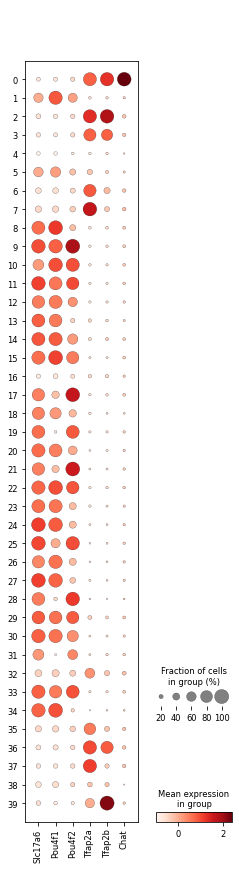

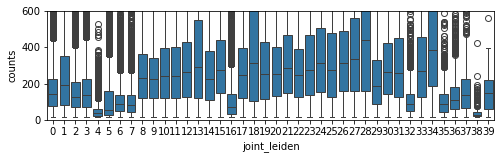

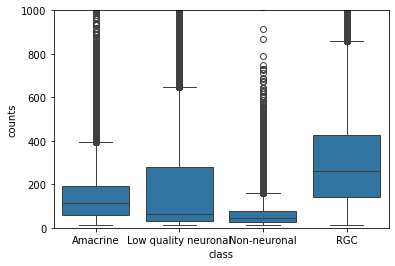

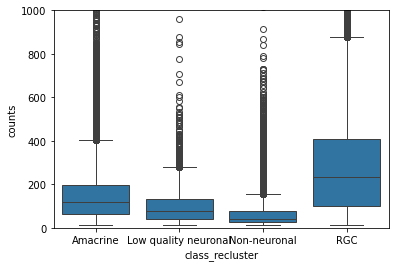

RGC                     0.455575
Amacrine                0.367096
Low quality neuronal    0.109401
Non-neuronal            0.067928
Name: class, dtype: float64
RGC                     0.564952
Amacrine                0.355433
Non-neuronal            0.070762
Low quality neuronal    0.008853
Name: class_recluster, dtype: float64


class,Amacrine,Low quality neuronal,Non-neuronal,RGC
joint_leiden,,,,
0,42615,118,26,62
1,853,9705,69,19781
2,26714,180,10,156
3,24229,95,8,309
4,94,376,18459,168
5,2843,9260,137,5632
6,15665,390,17,670
7,14682,587,13,289
8,147,1765,16,10727


In [60]:
adata = sc.read_h5ad(os.path.join(BASE_DIR,"data","control_130_6","merged_control_cluster_final.h5ad"))
suffix="_v3"
#gene_markers
sc.pl.dotplot(adata,var_names=['Slc17a6','Pou4f1','Pou4f2','Tfap2a','Tfap2b','Chat'],groupby='joint_leiden')
#transcript counts
with plt.rc_context({'figure.figsize':(8,2)}):
    sns.boxplot(adata.obs,x='joint_leiden',y='counts')
    plt.ylim(0,600)
    plt.show()

#Manual assignment
all_types = len(adata.obs['joint_leiden'].unique())

assignments = {
    'Non-neuronal':[4,16], 
    'Amacrine':[0,2,3,6,7,35,36,37,39],
    'RGC':[1,5,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34],
}

seen = []
for g in assignments:
     seen.extend(assignments[g])

remaining = set(range(all_types))- set(seen)


assignments['Low quality neuronal'] = list(remaining)


assignment_mapper = {}
for g in assignments:
    for t in assignments[g]:
        assignment_mapper[str(t)] = g


adata.obs[f'class{suffix}'] = adata.obs['joint_leiden'].map(assignment_mapper)

sns.boxplot(adata.obs,x='class',y='counts')
plt.ylim(0,1000)
plt.show()

sns.boxplot(adata.obs,x=f'class{suffix}',y='counts',order=['Amacrine','Low quality neuronal','Non-neuronal','RGC'])
plt.ylim(0,1000)
plt.show()

print(adata.obs['class'].value_counts(normalize=True))
print(adata.obs[f'class{suffix}'].value_counts(normalize=True))

pd.crosstab(adata.obs['joint_leiden'],adata.obs['class'])


In [63]:
importlib.reload(container)
def merge_preprocess(assignment_mapper, clust_col='joint_leiden',class_col='class_recluster',subd="control_130_6",adata_f="merged_control_cluster_final.h5ad",adata_fout="RGC_control_v2.h5ad"):
    adata=sc.read_h5ad(os.path.join(BASE_DIR,"data",subd,adata_f))
    adata.obs[class_col] = adata.obs[clust_col].map(assignment_mapper)
    adata.write_h5ad(os.path.join(BASE_DIR,"data",subd,adata_f))
    
    runs =["140g_rn3_130", "140g_rn4_130", "140g_rn5_130","140g_rn7_130","140g_rn16_130","140g_rn17_130"]#dummy
    num_regions=[0,1,2,3] #dummy
    feature_names_f = constants.FEATURE_NAMES_F_130
    xgb_model_f = constants.XGB_F_130
    rgc_median_transcripts = constants.RGC_MEDIAN_TRANSCRIPTS_DICT[xgb_model_f]
    cont = container.RunContainer(runs,base_dir=constants.BASE_DIR,regions_lst=num_regions,feature_names_f=feature_names_f,xgb_model_f=xgb_model_f,rgc_median_transcripts=rgc_median_transcripts)
    adata = cont.joint_RGC_pipeline(adata_f=adata_f,adata_fout=adata_fout,class_col=class_col,subd=subd, batch_key=None)



    

In [64]:
merge_preprocess(assignment_mapper,adata_fout="RGC_control_v3.h5ad")

Loading from:  ../../spatial_rgc/data/control_130_6/merged_control_cluster_final.h5ad
Will output to:  ../../spatial_rgc/data/control_130_6/RGC_control_v3.h5ad
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 1.]
 [1. 2. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
Target sum: 174.0


In [107]:
adata= sc.read_h5ad(os.path.join(BASE_DIR,"data","control_130_6","merged_control_cluster_final.h5ad"))


In [ ]:
suffix="_v3"
#gene_markers
sc.pl.dotplot(adata,var_names=['Slc17a6','Pou4f1','Pou4f2','Tfap2a','Tfap2b','Chat'],groupby='joint_leiden')
#transcript counts
with plt.rc_context({'figure.figsize':(8,2)}):
    sns.boxplot(adata.obs,x='joint_leiden',y='counts')
    plt.ylim(0,600)
    plt.show()

#Manual assignment
all_types = len(adata.obs['joint_leiden'].unique())

assignments = {
    'Non-neuronal':[4,16], 
    'Amacrine':[0,2,3,6,7,35,36,37,39],
    'RGC':[1,5,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34],
}

seen = []
for g in assignments:
     seen.extend(assignments[g])

remaining = set(range(all_types))- set(seen)


assignments['Low quality neuronal'] = list(remaining)


assignment_mapper = {}
for g in assignments:
    for t in assignments[g]:
        assignment_mapper[str(t)] = g


adata.obs[f'class{suffix}'] = adata.obs['joint_leiden'].map(assignment_mapper)

sns.boxplot(adata.obs,x='class',y='counts')
plt.ylim(0,1000)
plt.show()

sns.boxplot(adata.obs,x=f'class{suffix}',y='counts',order=['Amacrine','Low quality neuronal','Non-neuronal','RGC'])
plt.ylim(0,1000)
plt.show()

print(adata.obs['class'].value_counts(normalize=True))
print(adata.obs[f'class{suffix}'].value_counts(normalize=True))

pd.crosstab(adata.obs['joint_leiden'],adata.obs['class'])

In [139]:
#Update original dataset 
suffix = "_v3"
adata_rgc = sc.read_h5ad(os.path.join(BASE_DIR,"data","control_130_6",f"RGC_control{suffix}.h5ad"))
mapper = {i:f"C{i+1}" for i in range(0,45)}
mapper[45] = 'Unassigned'
adata_rgc.obs[f'final_assignment{suffix}'] = adata_rgc.obs['joint_type'].map(mapper)

#Update final_assignments in joint dataset
#adata= sc.read_h5ad(os.path.join(BASE_DIR,"data","control_130_6","merged_control_cluster_final.h5ad"))
#adata.obs[f'class{suffix}'] = adata.obs['class_recluster']
adata.obs[f'final_assignment{suffix}'] = adata_rgc.obs[f'final_assignment{suffix}']
adata.obs.loc[pd.isna(adata.obs[f'final_assignment{suffix}']),f'final_assignment{suffix}'] = adata.obs[f'class{suffix}']

#adata_rgc = sc.read_h5ad(os.path.join(BASE_DIR,"data","control_130_6","RGC_control_v2.h5ad"))

In [151]:
adata_rgc.write_h5ad(os.path.join(BASE_DIR,"data","control_130_6","RGC_control_v3.h5ad"))
adata.write_h5ad(os.path.join(BASE_DIR,"data","control_130_6","merged_control_cluster_final.h5ad"))

In [63]:
adata_rgc = sc.read_h5ad(os.path.join(BASE_DIR,"data","control_130_6","RGC_control_v3.h5ad"))
adata = sc.read_h5ad(os.path.join(BASE_DIR,"data","control_130_6","merged_control_cluster_final.h5ad"))

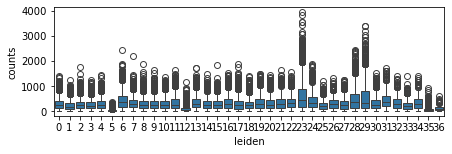

In [42]:
with plt.rc_context({'figure.figsize':(7,2)}):
    sns.boxplot(adata_rgc.obs,x='leiden',y='counts')
    low_quality_clusters = ['5','12','35','56']

In [43]:
low_quality_idx = adata_rgc.obs[adata_rgc.obs['leiden'].isin(low_quality_clusters)].index
adata_rgc = adata_rgc[~adata_rgc.obs['leiden'].isin(low_quality_clusters)]

n_clust_f = len(adata_rgc.obs['leiden'].cat.categories)

remap_clust = dict(zip(adata_rgc.obs['leiden'].cat.categories, [str(i) for i in range(n_clust_f)]))
adata_rgc.obs['leiden'] = adata_rgc.obs['leiden'].map(remap_clust)

adata.obs.loc[low_quality_idx,'class_v3'] = 'Low quality neuronal'
adata.obs.loc[low_quality_idx,'final_assignment_v3'] = 'Low quality neuronal'



/var/folders/b3/jkbfjl310vdb0w4vhhz87pdr0000gn/T/ipykernel_29550/931389520.py:7: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_rgc.obs['leiden'] = adata_rgc.obs['leiden'].map(remap_clust)


In [90]:
adata.obs

,Size,center_x,center_y,max_areas,aligned_center_x,aligned_center_y,counts,class,final_assignment,run,...,D/V,N/T,final_x,final_y,Anti-Rat,CD31+,class_v2,final_assignment_v2,class_v3,final_assignment_v3
cell_id,,,,,,,,,,,,,,,,,,,,,
1_rg0_rn3,1727.596673,3832.322909,8517.008033,233.443880,3832.322909,8517.008033,205.0,Non-neuronal,Non-neuronal,3.0,...,Dorsal,Nasal,-1204.091528,582.284460,NaN,NaN,Non-neuronal,Non-neuronal,Non-neuronal,Non-neuronal
2_rg0_rn3,528.467680,2721.609974,8563.660997,82.293166,2721.609974,8563.660997,62.0,Low quality neuronal,Low quality neuronal,3.0,...,Dorsal,Nasal,-144.406525,918.331211,NaN,NaN,RGC,C23,RGC,C23
3_rg0_rn3,592.846687,2871.349241,8604.997911,94.049333,2871.349241,8604.997911,314.0,RGC,C32,3.0,...,Dorsal,Nasal,-270.977353,828.273372,NaN,NaN,RGC,C32,RGC,C32
4_rg0_rn3,76.694992,3398.354443,8628.285034,51.129994,3398.354443,8628.285034,42.0,Amacrine,Amacrine,3.0,...,Dorsal,Nasal,-758.235587,626.144240,NaN,NaN,Amacrine,Amacrine,Amacrine,Amacrine
5_rg0_rn3,529.027497,3791.413223,8664.815563,144.059692,3791.413223,8664.815563,174.0,RGC,C29,3.0,...,Dorsal,Nasal,-1115.095845,457.382751,NaN,NaN,RGC,C29,RGC,C29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22629_rg4_rn17,74.177440,8725.436404,9180.412372,49.451627,12327.366082,5251.974727,109.0,RGC,C23,17.0,...,Ventral,Temporal,1061.202404,-1212.122032,175.066949,False,RGC,C23,RGC,C23
22630_rg4_rn17,68.019313,8720.401527,9189.618339,45.346209,12322.331206,5261.180694,59.0,RGC,C18,17.0,...,Ventral,Temporal,1069.082267,-1219.050781,176.184178,False,RGC,Unassigned,RGC,Unassigned
22643_rg4_rn17,62.141101,8691.214201,9359.375532,41.427401,12293.143879,5430.937887,23.0,Low quality neuronal,Low quality neuronal,17.0,...,Ventral,Temporal,1154.569762,-1368.587710,178.380316,False,Amacrine,Amacrine,Amacrine,Amacrine


In [62]:
adata_rgc.write_h5ad(os.path.join(BASE_DIR,"data","control_130_6","RGC_control_mapped.h5ad"))
adata.write_h5ad(os.path.join(BASE_DIR,"data","control_130_6","merged_control_cluster_final_mapped.h5ad"))